In [3]:
using DrWatson

In [4]:
@quickactivate "RxInferThesisExperiments"

In [5]:
using RxInferThesisExperiments, RxInfer, StaticArrays, Plots, PGFPlotsX, LaTeXStrings
using LinearAlgebra, StableRNGs, Random, BenchmarkTools, ColorSchemes, Dates

[ Info: Precompiling RxInferThesisExperiments [45155ac3-0a9e-41cf-b3f8-8307b1a2d51a]


In [6]:
# For the thesis I use the `pgfplotsx` backend of the `Plots`, since it generates high-quiality plots
# But it is reallyyy slow, if some wants to generate plots faster uncoment the `gr()` line
pgfplotsx()

# Use fast plotting backend
# gr()

Plots.PGFPlotsXBackend()

In [7]:
const environment = HGFEnvironment()

HGFEnvironment()

In [8]:
# Include the model specification
include(srcdir("models", "rxinfer", "hgf.jl"));

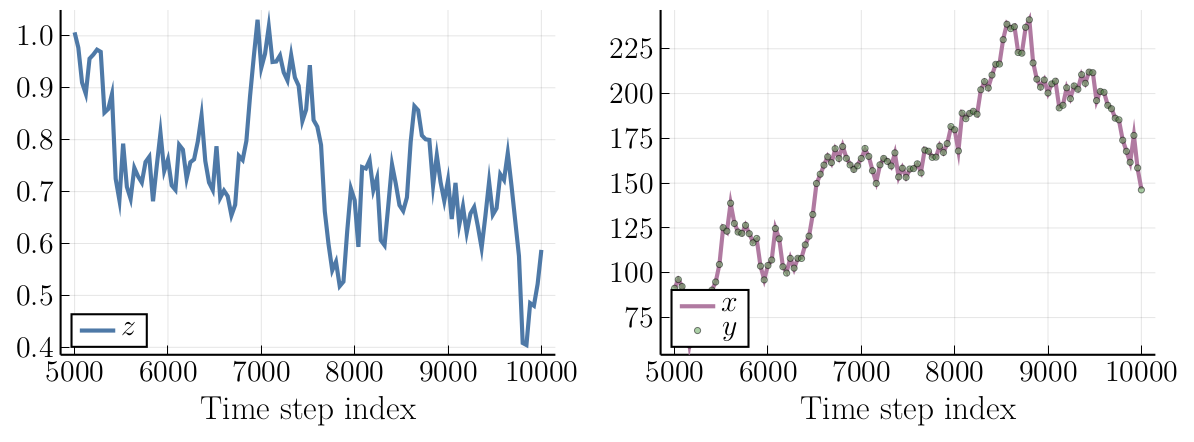

In [9]:
T = 10_000
seed = 12345
rng = StableRNG(seed)

zstates, xstates, observations = rand(rng, environment, T);

# `plotting` range
prange = max((lastindex(observations) - 5000), firstindex(observations)):40:lastindex(observations)
colors = ColorSchemes.tableau_10

# Some default settings for plotting
pfontsettings = (
    titlefontsize=18,
    guidefontsize=16,
    tickfontsize=14,
    legendfontsize=14,
    legend = :bottomleft,
    size = (400, 300)
)

p1 = plot(xlabel = "Time step index", ylabel = ""; pfontsettings...)
p1 = plot!(prange, zstates[prange], color = colors[1], linewidth = 2, label = L"z")

p2 = plot(xlabel = "Time step index", ylabel = ""; pfontsettings...)
p2 = plot!(p2, prange, xstates[prange], color = colors[7], linewidth = 2, label = L"x")
p2 = scatter!(p2, prange, observations[prange], color = colors[5], ms = 2, alpha = 0.5, msw = 0, label = L"y")

plot(p1, p2, layout = @layout([ a b ]), size = (800, 300))

# Inference

In [10]:
model = hgf(environment.kappa, environment.omega)
results = run_inference(model, observations);

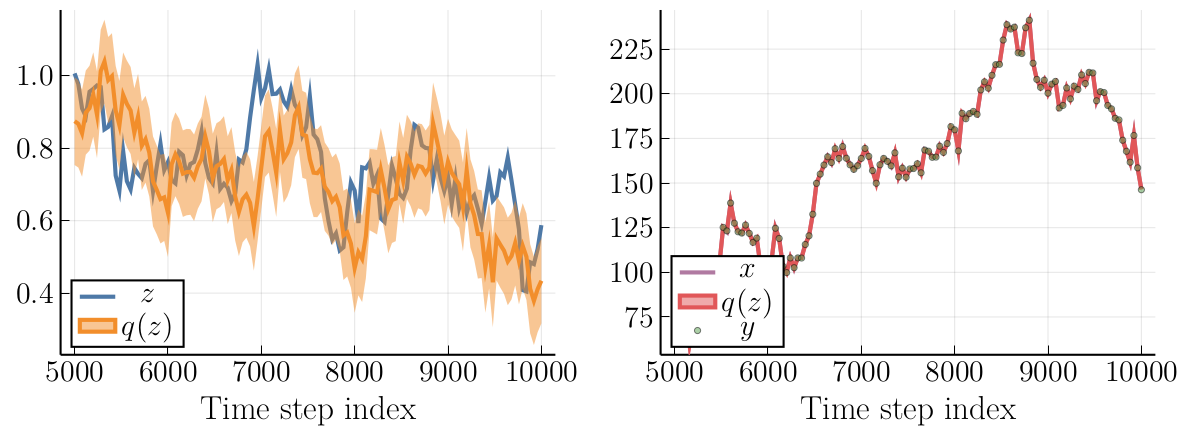

In [11]:
estimated = extract_posteriors(T, results)

emz = mean.(estimated[:z])
evz = std.(estimated[:z])

emx = mean.(estimated[:x])
evx = std.(estimated[:x])

p1 = plot(xlabel = "Time step index", ylabel = ""; pfontsettings...)
p1 = plot!(p1, prange, zstates[prange], color = colors[1], linewidth = 2, label = L"z")
p1 = plot!(p1, prange, emz[prange], ribbon = evz[prange], color = colors[2], linewidth = 2, label = L"q(z)")

p2 = plot(xlabel = "Time step index", ylabel = ""; pfontsettings...)
p2 = plot!(p2, prange, xstates[prange], color = colors[7], linewidth = 2, label = L"x")
p2 = plot!(p2, prange, emx[prange], ribbon = evx[prange], color = colors[3], linewidth = 2, label = L"q(x)")
p2 = scatter!(p2, prange, observations[prange], color = colors[5], ms = 2, alpha = 0.5, msw = 0, label = L"y")

plot(p1, p2, layout = @layout([ a b ]), size = (800, 300))

# Versions

In [12]:
versioninfo()

Julia Version 1.9.0
Commit 8e630552924 (2023-05-07 11:25 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 12 × Intel(R) Core(TM) i7-8850H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 12 virtual cores


In [13]:
] status

Project RxInferThesisExperiments v1.0.0
Status `~/.julia/dev/thesis/Project.toml`
  [b5ca4192] AdvancedVI v0.2.3
  [6e4b80f9] BenchmarkTools v1.3.2
  [76274a88] Bijectors v0.12.5
  [35d6a980] ColorSchemes v3.21.0
  [a93c6f00] DataFrames v1.5.0
  [31c24e10] Distributions v0.25.95
  [634d3b9d] DrWatson v2.12.5
  [442a2c76] FastGaussQuadrature v0.5.1
  [9fc3f58a] ForneyLab v0.12.0
  [f6369f11] ForwardDiff v0.10.35
  [14197337] GenericLinearAlgebra v0.3.11
  [19dc6840] HCubature v1.5.1
  [7073ff75] IJulia v1.24.2
  [b964fa9f] LaTeXStrings v1.3.0
  [bdcacae8] LoopVectorization v0.12.159
  [3bd65402] Optimisers v0.2.18
  [8314cec4] PGFPlotsX v1.6.0
  [e4faabce] PProf v2.2.2
  [91a5bcdd] Plots v1.38.15
  [92933f4c] ProgressMeter v1.7.2
  [37e2e3b7] ReverseDiff v1.14.6
  [86711068] RxInfer v2.11.1
  [860ef19b] StableRNGs v1.0.0
  [aedffcd0] Static v0.8.7
  [90137ffa] StaticArrays v1.5.25
⌅ [2913bbd2] StatsBase v0.33.21
  [4c63d2b9] StatsFuns v1.3.0
  [fce5fe82] Turing v0.25.1
  [37e2e46d] Line